## Makina Öğrenmesi ile Dolar Kuru Tahmini

## Kullanılan Kütüphaneler
### Pandas : Pandas ile bir veri bilimi projesindeki veri okuma, veri ön işleme ve veri temizleme aşamaları yapılır.
### Numpy : Çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan ve matematiksel işlemler yapabileceğimiz bir kütüphanedir
### Keras : Neredeyse her tür derin öğrenme modelini tanımlamak ve eğitmek için uygun bir yol sağlayan Python için bir derin öğrenme kütüphanesidir.
### Matplotlib : Veri görselleştirmesinde kullandığımız temel python kütüphanesidir. 2 ve 3 boyutlu çizimler yapmamızı sağlar.
### Sklearn : Scikit-learn veya Sklearn makine öğrenmesi modelleri oluşturmak için kullanılan Python temelli bir kütüphanedir. Regresyon, kümeleme ve sınıflandırma için kullanılan pek çok öğrenme algoritmasına sahiptir. Sklearn NumPy ve SciPy ile uyumludur.
### Yfinance:Yahoo Finance üzerinden finansal verileri almak için kullanılan bir Python kütüphanesidir. Özellikle hisse senedi, döviz, ve diğer finansal enstrümanların tarihsel verilerini kolayca çekmek ve analiz etmek için kullanılır

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


## Veriyi yahoo üzerinden çekme işlemi
## Verideki satır ve sütün sayısı

In [7]:
import yfinance as yf

start_date = '2015-01-01'
end_date = '2024-10-20'
df = yf.download('USDTRY=X', start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,2.331160,2.331160,2.331160,2.331160,2.331160,0
2015-01-02,2.330980,2.357000,2.330550,2.330980,2.330980,0
2015-01-05,2.342240,2.351730,2.327700,2.342240,2.342240,0
2015-01-06,2.330750,2.335500,2.315600,2.330750,2.330750,0
2015-01-07,2.324740,2.331650,2.320910,2.323610,2.323610,0
...,...,...,...,...,...,...
2024-10-11,34.252338,34.295490,34.251469,34.252338,34.252338,0
2024-10-14,34.276199,34.296459,34.242199,34.276199,34.276199,0
2024-10-15,34.252151,34.270340,34.187229,34.252151,34.252151,0


## Fiyat geçmişini veren grafik

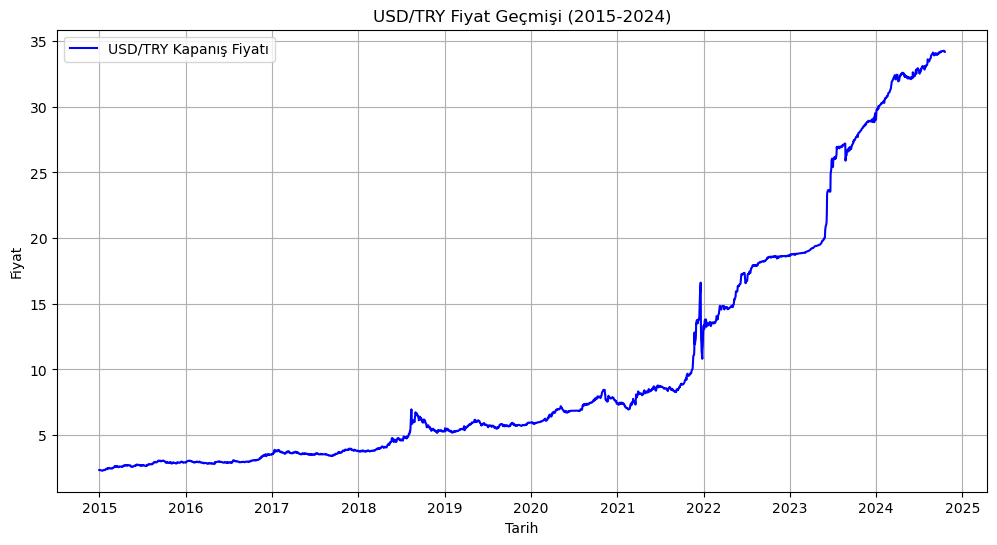

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='USD/TRY Kapanış Fiyatı', color='b')
plt.title('USD/TRY Fiyat Geçmişi (2015-2024)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend()
plt.show()


## Kapanış fiyatları için yeni bir veri seti oluşturma işlemi
## Eğitilecek verinin büyüklüğünün hesaplanması

In [25]:
import numpy as np

X_train = []
y_train = []

window_size = 60

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"X_train şekli (numpy): {X_train.shape}")
print(f"y_train şekli (numpy): {y_train.shape}")


X_train şekli (numpy): (1982, 60)
y_train şekli (numpy): (1982,)


## 3 Boyutlu Hale Getirme

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(f"X_train'in yeni şekli (3D): {X_train.shape}")


X_train'in yeni şekli (3D): (1982, 60, 1)


In [29]:
import numpy as np

X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

X_train = np.array(X_train).reshape(-1, window_size, 1)
y_train = np.array(y_train)

print(f"X_train şekli (3D): {X_train.shape}")
print(f"y_train şekli: {y_train.shape}")


X_train şekli (3D): (1982, 60, 1)
y_train şekli: (1982,)


## Modelini oluşturma

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

## Modelin Eğitilmesi

In [93]:
model.fit(X_train, y_train, batch_size=64, epochs=50)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0081
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.2016e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5902e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5051e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6878e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4242e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5377e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.2915e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1303e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.1560e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.0425e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2732e-04
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.6858e-04
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.9190e-04
Epoch 15/50
31/31 ━

## Test Edilecek Veri Setlerinin Oluşturulması

In [103]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = df[['Close']].copy()
dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]


## Test verisi

In [105]:
X_test = np.array(X_test)


Test Verisinin 3 Boyutlu Şekilde Yeniden Şekillendirilmesi

In [107]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## Modelin Tahmin Ettiği Fiyatların Alınması

In [109]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


## (RMSE) Root Mean Squared Error (Modelin Hata Alma Ölçüsünün Hesaplanması)

In [111]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 8.041947485362636


 ## Veri Grafiği

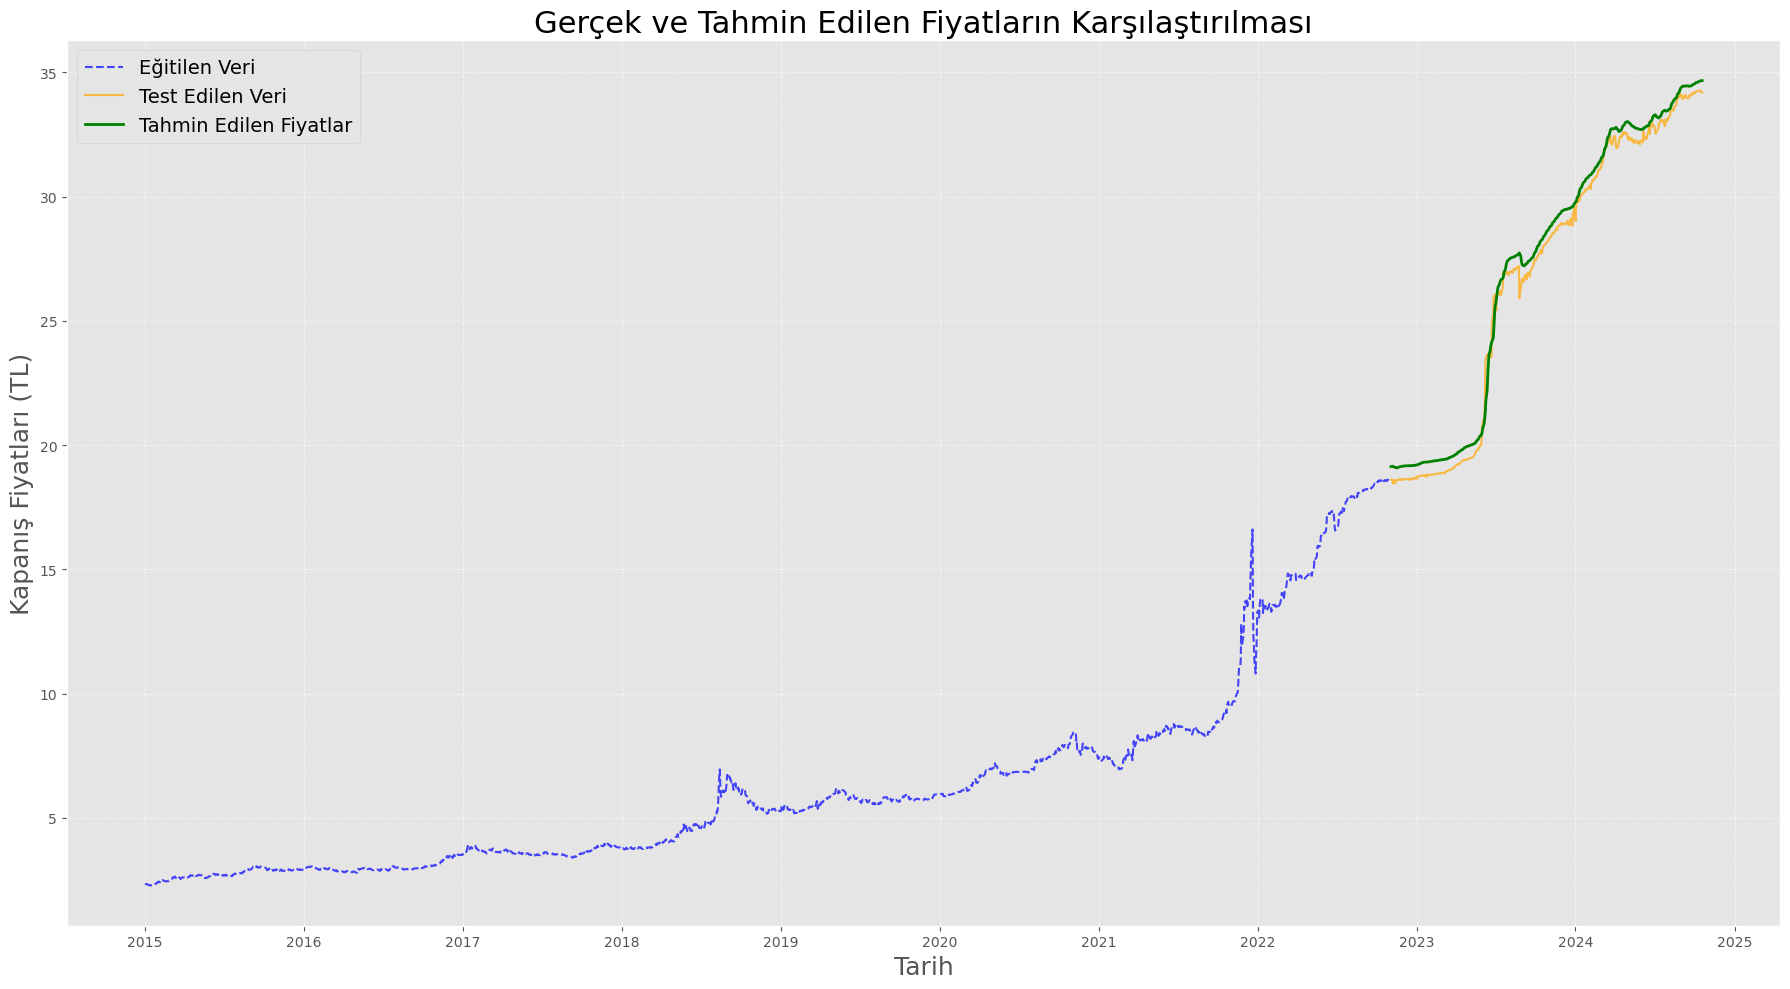

In [123]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(18,10))
plt.title('Gerçek ve Tahmin Edilen Fiyatların Karşılaştırılması', fontsize=22)
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Kapanış Fiyatları (TL)', fontsize=18)

plt.plot(train['Close'], label='Eğitilen Veri', linestyle='--', color='blue', alpha=0.7)

plt.plot(valid['Close'], label='Test Edilen Veri', linestyle='-', color='orange', alpha=0.7)

plt.plot(valid['Predictions'], label='Tahmin Edilen Fiyatlar', linestyle='-', color='green', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()

plt.show()



## Gerçek ve Tahmin Edilen Fiyatların Grafiği

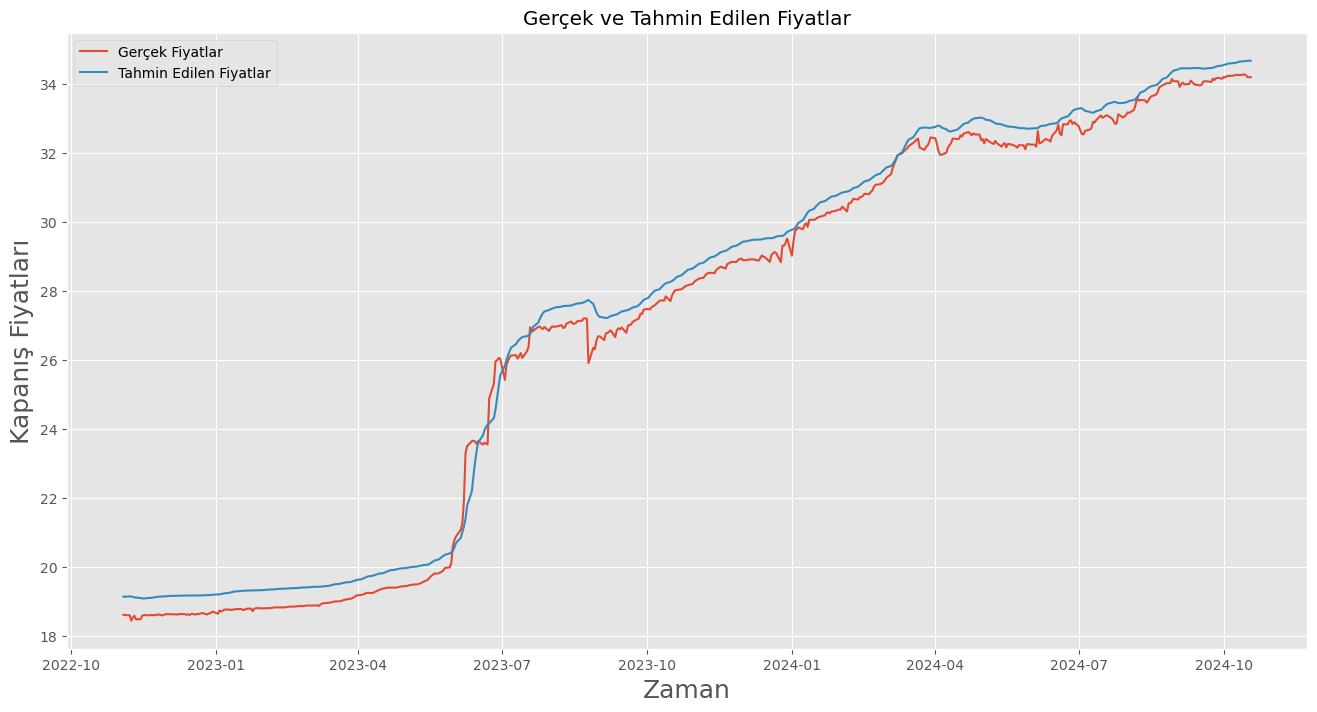

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Gerçek ve Tahmin Edilen Fiyatlar')
plt.plot(valid['Close'], label='Gerçek Fiyatlar')
plt.plot(valid['Predictions'], label='Tahmin Edilen Fiyatlar')

plt.xlabel('Zaman', fontsize=18)
plt.ylabel('Kapanış Fiyatları', fontsize=18)
plt.legend(loc='upper left')
plt.show()
